# **Fundamentals of Machine Learning**
# *Final Project: Seoul Bike Rental*

## General purpose libraries call

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [101]:
# Reading csv file
SeoulBikeData = pd.read_csv('./SeoulBikeData.csv', encoding='latin-1')

## Initial dataset summary

In [102]:
# Printing basic data info
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can see a total of 8760 data points with 13 features and 1 target value. The features contain object, int64 and float64 datatypes, while the target (Rented Bike Count) is an int64.

In [103]:
# Dataframe top rows
SeoulBikeData.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

Now we can have a better idea of what is the initial state of our dataset by showing some sample rows. We infer that we will need to transform object datatype features and normalize values.

## Initial dataset transformations

To structurate our dataset and improve the readness we can arrange the columns as:
1. Discrete variables (Date, Hour, Seasons, Holiday, Functioning Day): Those that have predifined categories for each possible value.
2. Continuous variables (Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)): Those having inifinite possible values
3. Target value (Rented Bike Count): The value for the model to predict

In [104]:
# Rearranging the dataset
SeoulBikeData  = SeoulBikeData[['Date',
                                'Hour',
                                'Seasons',
                                'Holiday',
                                'Functioning Day',
                                'Temperature(°C)',
                                'Humidity(%)',
                                'Wind speed (m/s)',
                                'Visibility (10m)',
                                'Dew point temperature(°C)',
                                'Solar Radiation (MJ/m2)',
                                'Rainfall(mm)',
                                'Snowfall (cm)',
                                'Rented Bike Count']]

As mentioned before, to have only numerical values in the dataset features, we should apply some transformations

In [105]:
# Factorizing object datatype columns: Seasons, Holiday, Fuctioning Day
SeoulBikeData[['Seasons', 'Holiday', 'Functioning Day']] = SeoulBikeData[['Seasons', 'Holiday', 'Functioning Day']].apply(lambda x: pd.factorize(x)[0])

# Transforming Date string to datetime datatype
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'], format='%d/%m/%Y')

From previous tests, we consider cleaner and more informative to extract from date feature the month and week day. 

In [106]:
# Obtaining month and day of the week for each date
SeoulBikeData['Month'] = (SeoulBikeData['Date'].dt.strftime('%m')).astype(int)
SeoulBikeData['Week Day'] = pd.factorize(SeoulBikeData['Date'].dt.day_name())[0]

# Inserting new columns in correct order
SeoulBikeData.insert(1, 'Month', SeoulBikeData.pop('Month'))
SeoulBikeData.insert(2, 'Week Day', SeoulBikeData.pop('Week Day'))

## General dataset exploration

In [107]:
SeoulBikeData.describe()

Date        Month     Week Day         Hour  \
count                           8760  8760.000000  8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744     6.526027     2.991781    11.500000   
min              2017-12-01 00:00:00     1.000000     0.000000     0.000000   
25%              2018-03-02 00:00:00     4.000000     1.000000     5.750000   
50%              2018-06-01 00:00:00     7.000000     3.000000    11.500000   
75%              2018-08-31 00:00:00    10.000000     5.000000    17.250000   
max              2018-11-30 00:00:00    12.000000     6.000000    23.000000   
std                              NaN     3.448048     2.003519     6.922582   

           Seasons      Holiday  Functioning Day  Temperature(°C)  \
count  8760.000000  8760.000000      8760.000000      8760.000000   
mean      1.504110     0.049315         0.033676        12.882922   
min       0.000000     0.000000         0.000000       -17.800000   
25%       1.000000     0.000000         0.000000         3.500000   
50%       2.000000     0.000000         0.000000        13.700000   
75%       2.000000     0.000000         0.000000        22.500000   
max       3.000000     1.000000         1.000000        39.400000   
std       1.114408     0.216537         0.180404        11.944825   

       Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count  8760.000000       8760.000000       8760.000000   
mean     58.226256          1.724909       1436.825799   
min       0.000000          0.000000         27.000000   
25%      42.000000          0.900000        940.000000   
50%      57.000000          1.500000       1698.000000   
75%      74.000000          2.300000       2000.000000   
max      98.000000          7.400000       2000.000000   
std      20.362413          1.036300        608.298712   

       Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                8760.000000              8760.000000   8760.000000   
mean                    4.073813                 0.569111      0.148687   
min                   -30.600000                 0.000000      0.000000   
25%                    -4.700000                 0.000000      0.000000   
50%                     5.100000                 0.010000      0.000000   
75%                    14.800000                 0.930000      0.000000   
max                    27.200000                 3.520000     35.000000   
std                    13.060369                 0.868746      1.128193   

       Snowfall (cm)  Rented Bike Count  
count    8760.000000        8760.000000  
mean        0.075068         704.602055  
min         0.000000           0.000000  
25%         0.000000         191.000000  
50%         0.000000         504.500000  
75%         0.000000        1065.250000  
max         8.800000        3556.000000  
std         0.436746         644.997468

Now we reached an uniform dataset concerning datatypes. We can see all our features being numericals variables.
We also do observe some general statistics per feature. Taking a quick look at the information, it seems that some of them (Holiday, Functioning Day, Wind speed (m/s), Dew point temperature (°C), Rainfall(mm), Snowfall (cm), Rented Bike Count) are not balanced. This is known by looking at minimum and maximum value, as well as the 50% quartile marker; if the 50% marker is not close to the average between the minimum and maximum, we could be having unbalanced features. We can assure our suspicions checking the mean value if it is much closer to one of the minimum or maximum values. Probably there will be a need to balance the features.

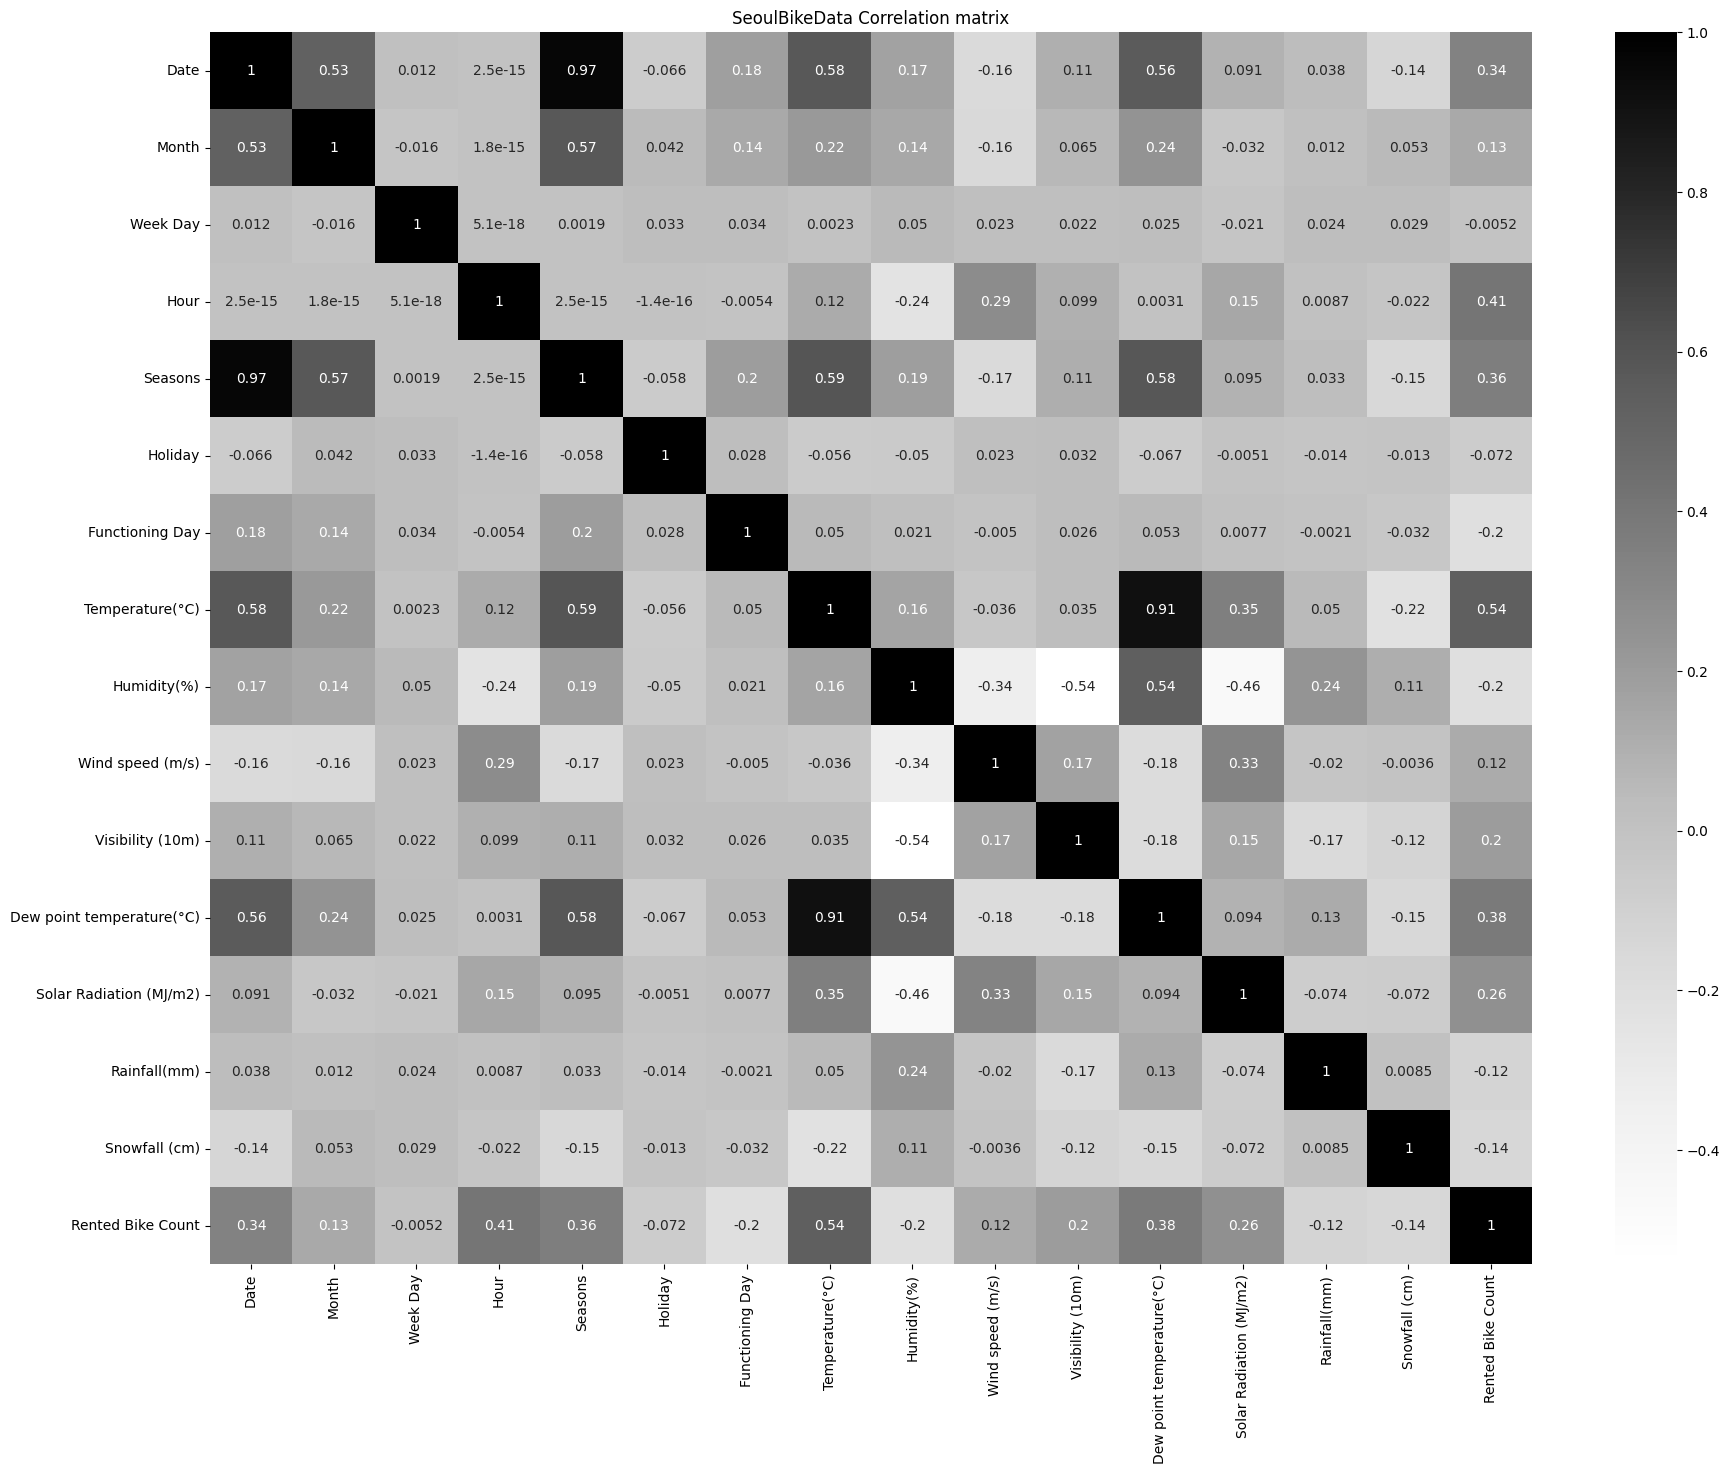

In [108]:
# Generating Correlation matrix of SeoulBikeData
correlation_matrix = SeoulBikeData.corr()

# Plotting Correlation matrix
num_rows, num_cols = SeoulBikeData.shape
plt.figure(figsize=(num_cols + (num_cols / 3), num_cols))
plt.title("SeoulBikeData Correlation matrix")
ax = sns.heatmap(correlation_matrix, annot = True, cmap= 'Greys')
plt.show()

Correlation matrix gives us a value for each pair relationship between the columns of our data set. If we have a positive value, it means that the correlation in linear (both values increase or decrease in the same direction); otherwise, a negative value refers an inverse relation (while a value increases, the other one decreases). The furthest the value is from 0, the most intense the relationship is.
For our target value we can observe that the features with the more responsibility in the results are the ones related to the seasons, the hour, and temperature. The relationships: Dew point temperature and Temperature, Dew point temperature and Date, and Dew Point Temperature and Temperature seem to be the most linearly intense ones, while Visibility and Humidity, and Solar Radiation and Humidity, the most inverse intense.

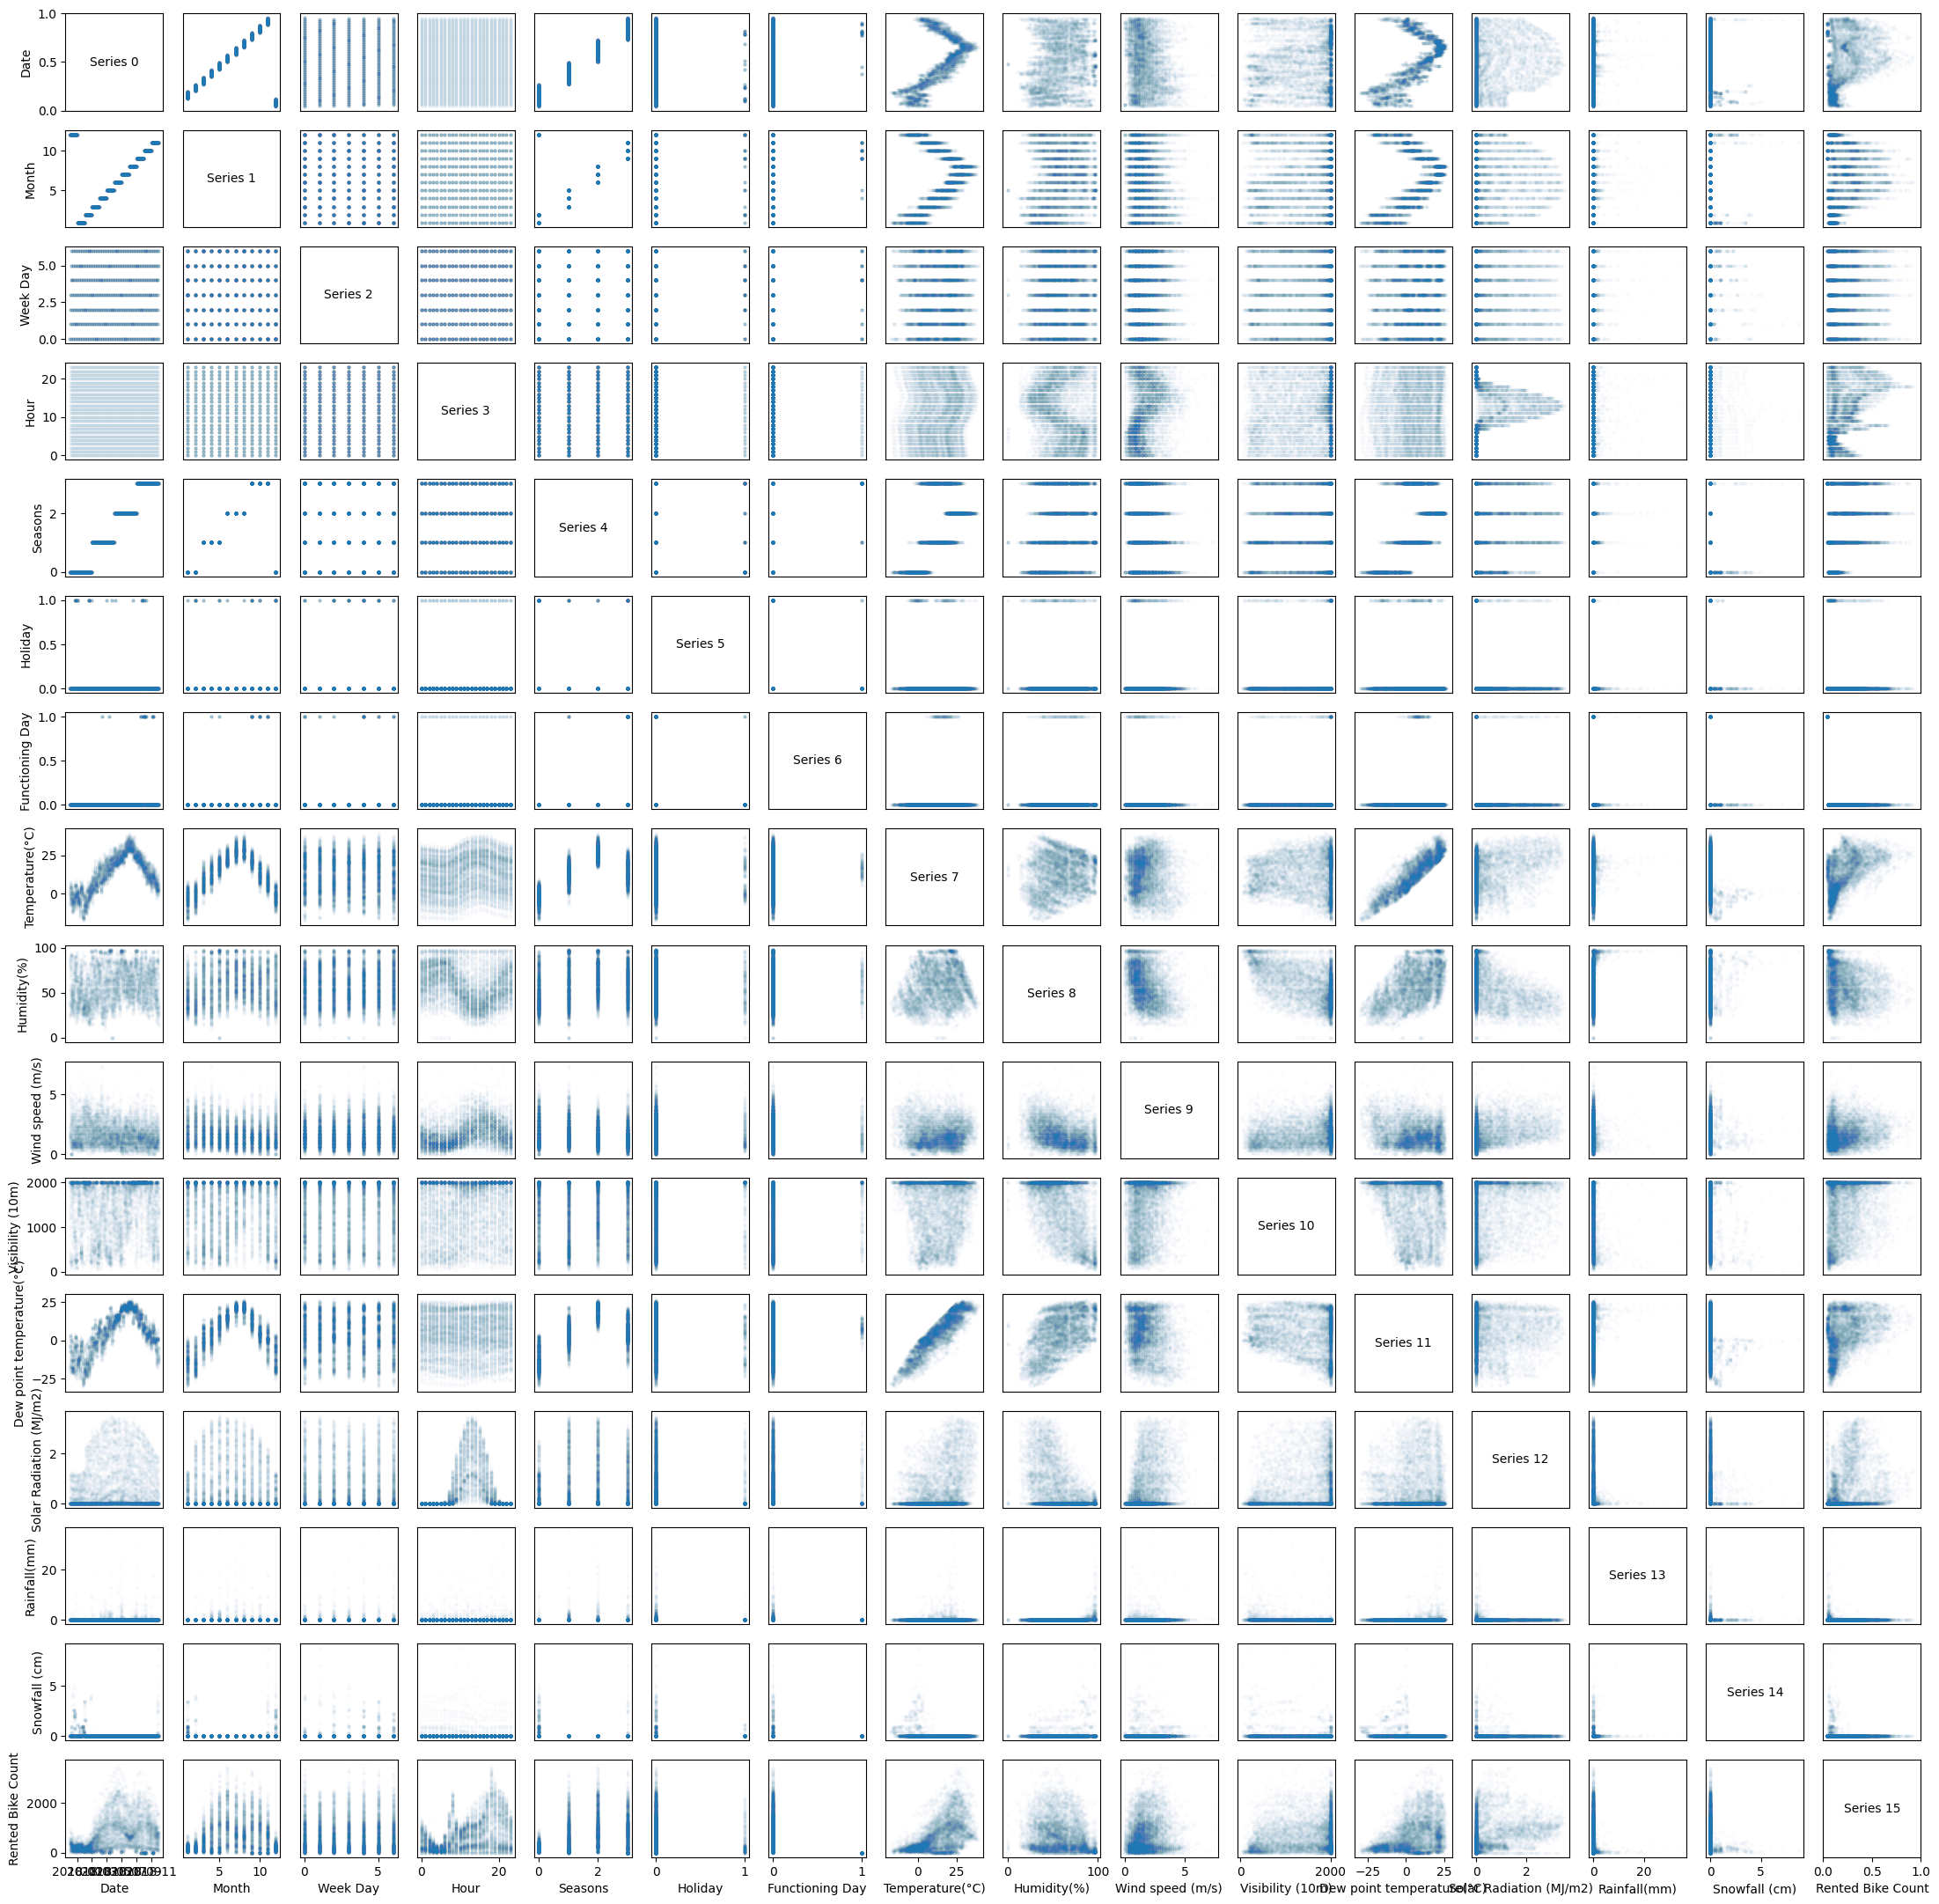

In [109]:
# (? Como interpretar relaciones)
# Function to generate scatterplot matrix
def scatterplot_matrix(data):
    num_col = data.shape[1]

    fig, axs = plt.subplots(num_col, num_col, figsize=(num_col * 1.7, num_col * 1.7))
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Either plot scatter or print number of serie
            if i != j: axs[i, j].scatter(data[col_name_j], data[col_name_i], s = 5, alpha=0.01)
            else: axs[i, j].annotate(f"Series {i}", (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

            # Setting rows and columns shared labels
            if j == 0: axs[i, j].set_ylabel(col_name_i)
            if i == num_col - 1: axs[i, j].set_xlabel(col_name_j)

            # Hide axis labels except for left and bottom charts
            if i < num_col - 1: axs[i][j].xaxis.set_visible(False)
            if j > 0: axs[i][j].yaxis.set_visible(False)

    return fig

# Plotting scatterplot matrix
scatter_matrix = scatterplot_matrix(SeoulBikeData)
plt.show()

By looking at the scatterplot matrix, we cannot find any kind of outliers or abnormal distribution in the features. They present the expected behavior for each relation according to their values.

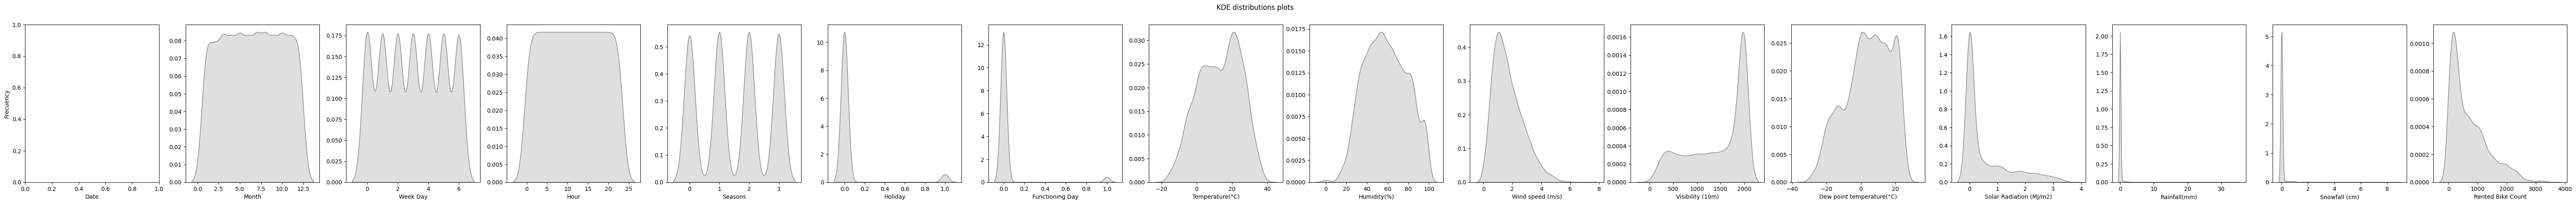

In [110]:
# To surpress annoying warnings
import warnings

# Function to generate KDE plots
def kde_plot(data):
    # Dropping Date column because of unssuported data type
    #data = data.drop(["Date"], axis=1)

    # Number of features
    num_col = data.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data.columns):
        warnings.filterwarnings('ignore')
        if(data_col != "Date"):
            sns.kdeplot(data[data_col], ax=axs[i], fill = True, color='grey')

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        else: axs[i].set_ylabel("")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting Kde
kde_plotted = kde_plot(SeoulBikeData)
plt.suptitle("KDE distributions plots")
plt.show()

The KDE plot show us the distributions of each column in our data set. It is important to check possible skews and/or outliers. 
As we predict previously, there are some features with huge skews, which are not desirable for our prediction model. The most obvious skewed features are:
- Holiday: Right skewed
- Functioning Day: Right skewed
- Wind Speed: Right skewed
- Visibility: Left skewed
- Dew point temperature: Left skewed
- Solar Radiation (MJ/m2): Right skewed
- Rainfall(mm): Right skewed
- Snowfall (cm): Right skewed
- Rented Bike Count: Right skewed

### Miscellaneous of functions for additional dataset exploration

We include some functions that are less informative but proposed to be used if needed.

In [111]:
def barplots_subplot(data, data_cols):
    '''
    Generate a subplot of barplot for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot

    @return: Figure object containing subplot
    '''

    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].bar(data[data_col].unique(), data[data_col].value_counts())

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

def histograms_subplot(data, data_cols, n_bins):
    '''
    Generate a subplot of histograms for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot
    @param n_bins: number of bins for hisogram plots

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].hist(data[data_col], bins = n_bins)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

def boxplots_subplot(data, data_cols):
    '''
    Generate a subplot of boxplots for the specified columns of a dataset

    @param data: pandas dataframe dataset
    @param data_cols: list of columns names from dataset to include in sublplot

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_cols):
        # Heatmap plotting
        sns.boxplot(ax=axs[i], x=col_name_i, y = 'Rented Bike Count', data = data)
        

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel('Rented Bike Count')
        axs[i].set_xlabel(col_name_i)
        
    return fig

from scipy.ndimage import gaussian_filter

def densities_subplot(data_features, data_target, s, bins = 1000):
    '''
    Generate a subplot of feature vs target density map for the specified columns of a dataset

    @param data_features: pandas dataframe containing the features to consider for plotting
    @param data_target: pandas serie containing target variable
    @param s: sigma value to consider for gaussian deviation calculation
    @param bins: number of bins to consider for density map

    @return: Figure object containing subplot
    '''
    # Number of features
    num_col = data_features.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_features.columns):
        # Heatmap plotting
        heatmap, x, y = np.histogram2d(data_features[col_name_i], data_target, bins = bins)
        heatmap = gaussian_filter(heatmap, sigma = s)
        axs[i].imshow(heatmap.T, origin='lower', cmap = 'gnuplot2')
        axs[i].axes.yaxis.set_ticks([])
        axs[i].axes.xaxis.set_ticks([])

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel(data_target.name)
        axs[i].set_xlabel(col_name_i)
    return fig

def joint_matrix(data):
    '''
    Plot a joint matrix from the given data

    @param data: pandas dataframe dataset
    '''
    num_col = data.shape[1]
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Plotting individual jointplots
            if i != j: sns.jointplot(x = col_name_i, y = col_name_j, data = data, kind = 'hex')


In [112]:
# Lists for feature type for some specific plottings
discrete_features = ['Month', 'Week Day','Hour','Seasons', 'Holiday', 'Functioning Day']
continuous_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

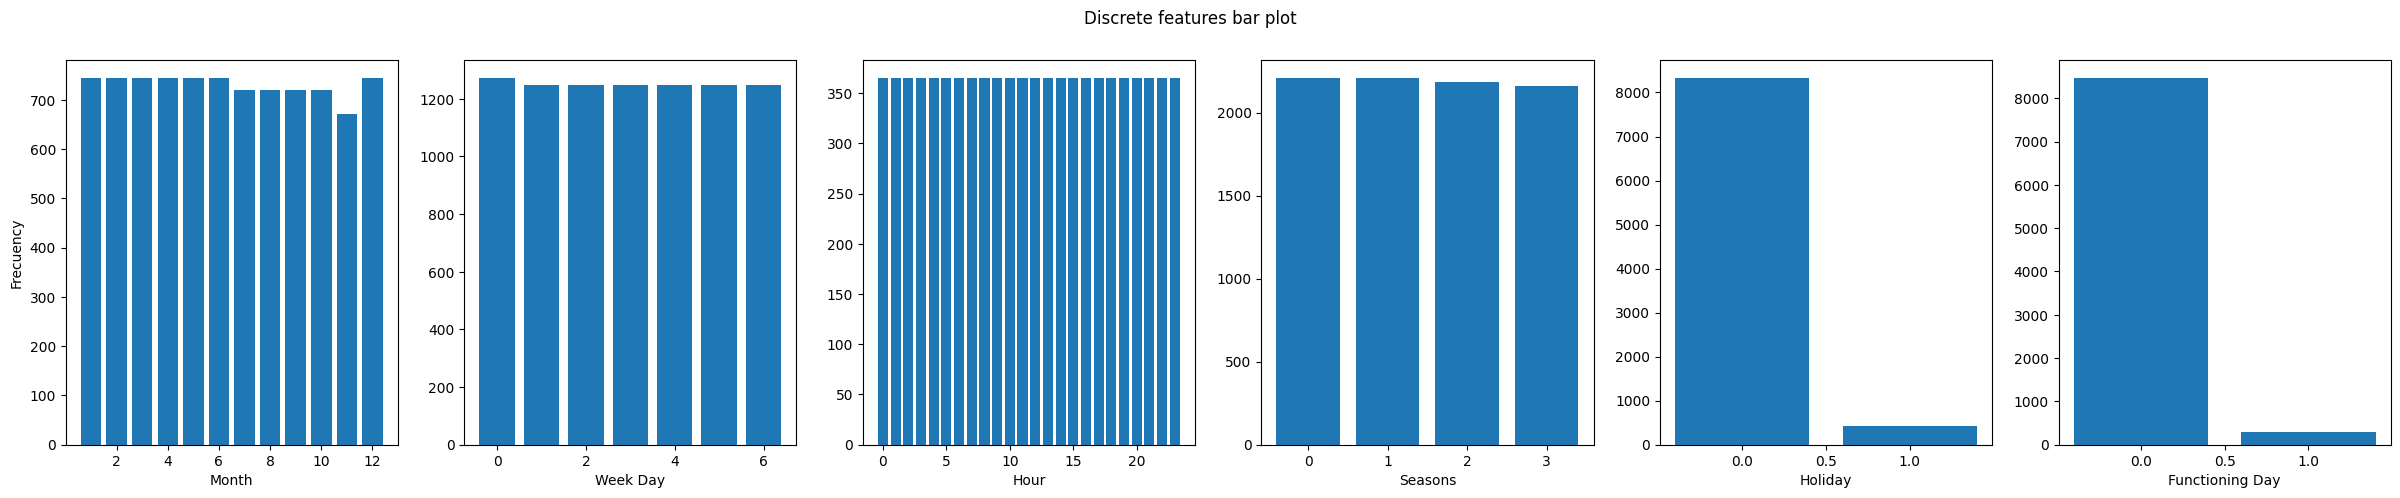

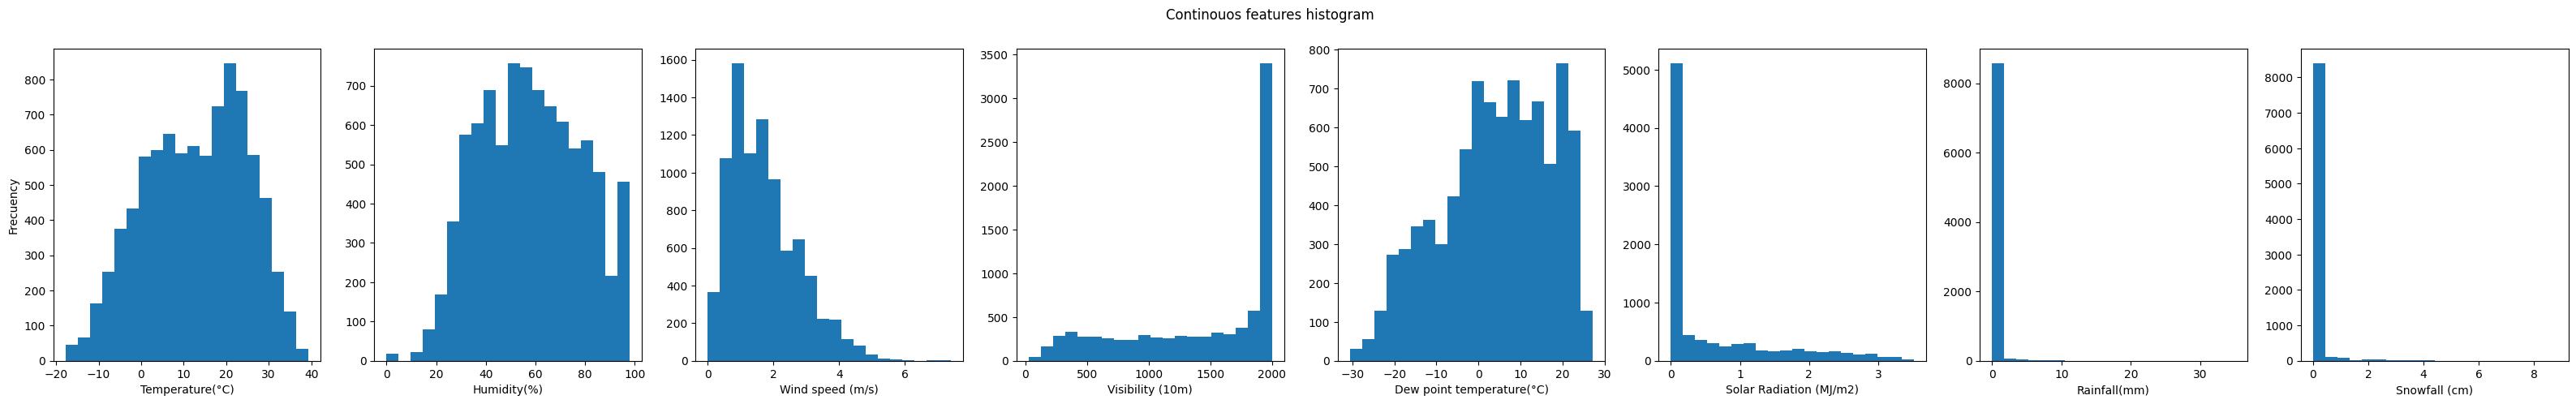

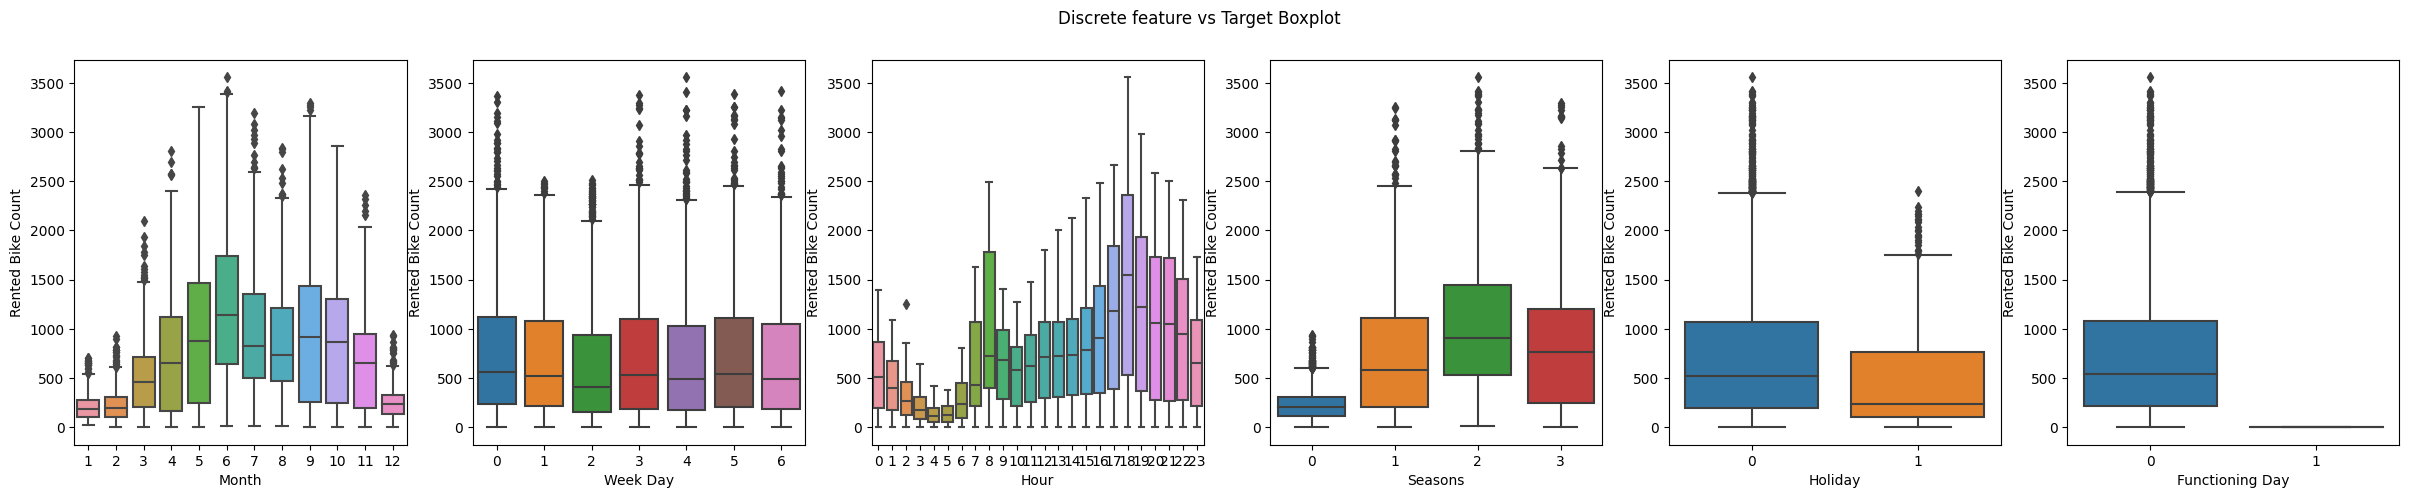

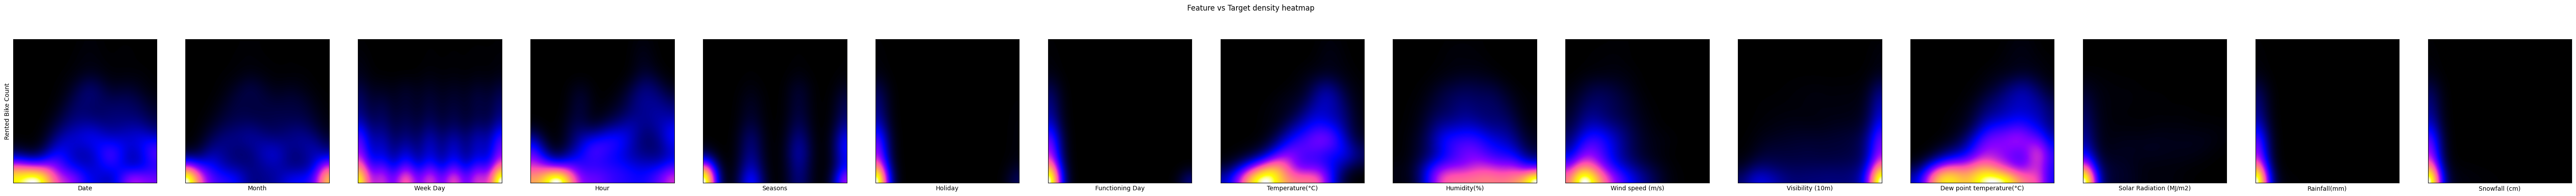

In [113]:
# Plotting barplot
discrete_barplot = barplots_subplot(SeoulBikeData, discrete_features)
plt.suptitle("Discrete features bar plot")
plt.show()

# Plotting histogram
continuous_histogram = histograms_subplot(SeoulBikeData, continuous_features, 20)
plt.suptitle("Continouos features histogram")
plt.show()

# Plotting discrete features boxplot
discrete_box = boxplots_subplot(SeoulBikeData, discrete_features)
plt.suptitle("Discrete feature vs Target Boxplot")
plt.show()

# Plotting features vs target heatmaps
features_target = densities_subplot(SeoulBikeData.drop('Rented Bike Count', axis=1), SeoulBikeData['Rented Bike Count'], 64)
plt.suptitle("Feature vs Target density heatmap")
plt.show()

## Further dataset transformation

From now on, since we already have the most important information from date feature represented as month and week day, we can drop Date feature from dataset.

In [114]:
# Removing Date column from dataset
SeoulBikeData = SeoulBikeData.drop('Date', axis=1)

### Balancing features

As previously said, we should balance our features to achieve better results in our implementation. We implement skew() method to have a metric which tell us the instensity of the unbalance (the furthest the value from 0, the bigger the intensity), and its orientation (a positive value refers to right skewed feature, as well as a negative value refers to left skew)

In [115]:
# Obtaining skew metrics for features
skew_features = SeoulBikeData.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})
print(skewness)

                                Skew
Rainfall(mm)               14.533232
Snowfall (cm)               8.440801
Functioning Day             5.170969
Holiday                     4.163603
Solar Radiation (MJ/m2)     1.504040
Rented Bike Count           1.153428
Wind speed (m/s)            0.890955
Humidity(%)                 0.059579
Week Day                    0.003109
Hour                        0.000000
Seasons                    -0.004382
Month                      -0.010458
Temperature(°C)            -0.198326
Dew point temperature(°C)  -0.367298
Visibility (10m)           -0.701786


Our suspicions were correct, now we are totally sure that we need to balance our features in some way.

To achieve the balance we choose Yeo-Johnson transformation, since it can handle negative and positive values (which is important for us since our dataset do contains both of them).
Yeo-Johnson transformation is an extension of the Box-Cox transformation. It is defined as:
$$
y(\lambda) = \begin{cases} 
\left(\frac{{y + 1}}{\lambda}\right)^{\lambda} - 1 & \text{if } \lambda \neq 0, y \geq 0 \\
-\left(\frac{{-y + 1}}{\lambda}\right)^{-\lambda} + 1 & \text{if } \lambda \neq 0, y < 0 \\
\log(y + 1) & \text{if } \lambda = 0, y \geq 0 \\
-\log(-y + 1) & \text{if } \lambda = 0, y < 0 
\end{cases}
$$
Where ${y}$ is the original variable, $\lambda$ is the transformation parameter which can take any real value (including zero), and the transformation is applied depending on the sign of ${y}$.  
It is not a bad idea to apply the transformation to all our features, even if not all of them have big unbalances.

In [116]:
# Balancing the data using Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

# Creating and fitting transformer
pt = PowerTransformer(method='yeo-johnson')
pt.fit(SeoulBikeData)

# Transforming data features
SeoulBikeData = pd.DataFrame(pt.transform(SeoulBikeData), columns=SeoulBikeData.columns)

# Printing post-processing skew metrics
skew_features = SeoulBikeData.skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})
print(skewness)

                               Skew
Functioning Day            5.170969
Holiday                    4.163603
Snowfall (cm)              4.103148
Rainfall(mm)               3.713710
Solar Radiation (MJ/m2)    0.563062
Wind speed (m/s)           0.000858
Humidity(%)               -0.068317
Dew point temperature(°C) -0.124635
Rented Bike Count         -0.127438
Seasons                   -0.161645
Month                     -0.170873
Week Day                  -0.192835
Temperature(°C)           -0.234084
Hour                      -0.241479
Visibility (10m)          -0.520803


We can see that the skews have been strongly reduced, hopefully, improving our models predictions.

### Normalization

It is necesary to achieve good results, to constrain all the features to similar variable ranges, so the model coul converge as well as be scale independent. With this preprocess task, we also aim to achieve a model with equal treatment of features.\
Since it is not necessary to normalize the target value and we can save some time by not reconverting the predictions obtained to the original results space, we will separate the columns from our dataset into those that are features and the target value. To achieve it, we simply create two lists (one for each of this subgroups) containing the names of the columns so we can simply call them when needed.

In [117]:
X = ['Month',
     'Week Day',
     'Hour',
     'Seasons',
     'Holiday',
     'Functioning Day',
     'Temperature(°C)',
     'Humidity(%)',
     'Wind speed (m/s)',
     'Visibility (10m)',
     'Dew point temperature(°C)',
     'Solar Radiation (MJ/m2)',
     'Rainfall(mm)',
     'Snowfall (cm)']

y = ['Rented Bike Count']

For normalization transformation, we wanted to reduce the range of our feature values from 0 to 1. Since we are pretty sure that our data set do not have any outlier, we choosed MinMax normalization which, for every feature, is given by:\
$X_{\text{scaled}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}}$


In [118]:
from sklearn.preprocessing import MinMaxScaler

# Creating scaler object
norm = MinMaxScaler().fit(SeoulBikeData[X])

# Transforming data
X_norm = norm.transform(SeoulBikeData[X])
X_norm = pd.DataFrame(X_norm, columns=X)

# Printing the data description
X_norm.describe()

Month     Week Day         Hour      Seasons      Holiday  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.535128     0.534497     0.555757     0.525529     0.049315   
std       0.310335     0.331401     0.292065     0.371147     0.216537   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.322245     0.213717     0.331839     0.385764     0.000000   
50%       0.595856     0.562691     0.581336     0.710083     0.000000   
75%       0.844114     0.861799     0.799920     0.710083     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Functioning Day  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count      8760.000000      8760.000000  8760.000000       8760.000000   
mean          0.033676         0.546293     0.639109          0.441811   
std           0.180404         0.206940     0.192307          0.175853   
min           0.000000         0.000000     0.000000          0.000000   
25%           0.000000         0.385959     0.489252          0.304970   
50%           0.000000         0.562105     0.633539          0.434469   
75%           0.000000         0.712681     0.789558          0.564933   
max           1.000000         1.000000     1.000000          1.000000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       8760.000000                8760.000000              8760.000000   
mean           0.660916                   0.548499                 0.332348   
std            0.346656                   0.233313                 0.392980   
min            0.000000                   0.000000                 0.000000   
25%            0.339695                   0.377852                 0.000000   
50%            0.791536                   0.548531                 0.020835   
75%            1.000000                   0.741896                 0.770881   
max            1.000000                   1.000000                 1.000000   

       Rainfall(mm)  Snowfall (cm)  
count   8760.000000    8760.000000  
mean       0.059154       0.050521  
std        0.233956       0.218922  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        1.000000       1.000000

Now we can easily see how the transformation was correctly made, as well as we confirm that the balance of the features was correctly made by the same arguments we identified the unbalance.

## Models testing

For model test phase, we need to split our data set into training (80%) and testing (20%) data.

In [119]:
from sklearn.model_selection import train_test_split, cross_val_score

# Splitting the data into training and temporary (validation + test) sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, SeoulBikeData[y], test_size=0.2, random_state=12)

### Cross validation (K-Folds)  

Since our dataset is not a really big one (less than 10k registers), we implemented K-Folds Cross Validation model to achieve a more robust models training without needing to split our dataset also into validation data.  
K-Folds divide the dataset into K subsets (folds) and then train and evaluate the model K times, each time using a different fold as the test set and the remaining folds as the training set.

In [120]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Function to apply K-Folds Cross Validation in a given data set on a specific model
def cross_validation(model, X, y, k=5):
    scores = cross_val_score(model, X, y, cv=k)
    prediction = cross_val_predict(model, X, y, cv=k)
    return scores, prediction

In [121]:
# List to store the obtained predictions for further analysis
y_preds = []

### Models training and initial evaluation

#### Setting up models for initial training and evaluation

Due to the nature of the problem (supervised learning with continuous type target value) we focused the search on regression models. For this first phase of model selection, we tested a wide variety of regressors on their default versions. The tested models are:  
1. Linear Regressor: models the relationship between the input features and the output by fitting a linear equation to the observed data. The equation for multiple variables is the linear combination $y = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n$ where $y$ is the predicted output, $x_1, x_2, \ldots, x_n$ are the input features, $b$ is the intercept and $w_1, w_2, \ldots, w_n$ are the weights associated with each feature.
2. Ridge Regressor: introduces a regularization term to the traditional linear regression objective function. The standard linear regression objective function is modified to include a regularization term, resulting in $\text{minimize} \; J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{n} w_j^2$ where $J(w)$ is the objective function to be minimized, $y_i$ is the actual output for the $i$-th training example, $\hat{y}_i$ is the predicted output for the $i$-th training example, $w_j$ are the regression coefficients, $\alpha$ is the regularization parameter, $m$ is the number of training examples and $n$ is the number of features.
3. Lasso Regressor: introduces a penalty term to the linear regression objective function, which is the absolute value of the coefficients multiplied by a regularization parameter $\alpha$. The Lasso regression objective function is given by $\text{minimize} \; J(w) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{n} |w_j|$ where $J(w)$ is the objective function to be minimized, $y_i$ is the actual output for the $i$-th training example, $\hat{y}_i$ is the predicted output for the $i$-th training example, $w_j$ are the regression coefficients, $\alpha$ is the regularization parameter, $m$ is the number of training examples and $n$ is the number of features.
4. Polynomial Regressor: extends linear regression by considering polynomial relationships between the independent variable(s) and the dependent variable. It allows nonlinear relationships by introducing polynomial terms. It's general form for a polynomial regression equation of degree $d$ is $y = w_0 + w_1 x + w_2 x^2 + \ldots + w_d x^d + \epsilon$ where $y$ is the dependent variable (output), $x$ is the independent variable (input), $w_0, w_1, \ldots, w_d$ are the polynomial terms of the input variable and $\epsilon$ represents the error term.
5. Decision Tree Regressor: operates by recursively partitioning the feature space into regions and making predictions within each region. The algorithm selects decision points based on features and split criteria, optimizing for minimal variance in the target variable within each subset.
6. Support Vector Regressor: works by finding a hyperplane in a high-dimensional space that captures a trade-off between maximizing the margin (distance between data points and the hyperplane) and minimizing the prediction error. The algorithm identifies a subset of training data points, called support vectors, that are crucial in determining the position of the hyperplane.
7. Random Forest Regressor: ensemble learning algorithm which operates by constructing a multitude of decision trees during the training phase and outputs the average prediction of the individual trees for regression tasks. Each tree is trained on a different subset of the data, and randomness is introduced in the feature selection process and the bootstrapping of training samples.

In [122]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Linear model
linear_regr = LinearRegression()

# Ridge model
ridge_model = Ridge(alpha=0.01)

# Lasso model
lasso_model = Lasso(alpha=0.01)

# Polynomial model
degree = 2 # Polynomial degree
poly_regr = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Decision model
dt_model = DecisionTreeRegressor(random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Support Vector Machine model
svr_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

# Creating list of models and names
model_list = [linear_regr, ridge_model, lasso_model, poly_regr, dt_model,svr_model, rf_model]
model_names = ["Linear", "Ridge", "Lasso", "Polynomial", "Decision Tree", "Support Vector Machine", "Random Forest"]

#### Initial Training and Evaluation of models

In [123]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Lists to store metrics
scores_list = []
scores_mean_list = []
scores_std_list = []
mse_list = []
r2_list = []
mae_list = []

# Training and evaluating each model
for model in model_list:
    score, prediction = cross_validation(model, X_train, y_train)

    scores_list.append(score)
    scores_mean_list.append(score.mean())
    scores_std_list.append(score.std())
    y_preds.append(prediction)
    mse_list.append(mean_squared_error(y_train, prediction))
    r2_list.append(r2_score(y_train, prediction))
    mae_list.append(mean_absolute_error(y_train, prediction))


#### Metrics Dataframe creation

In [124]:
metrics = {"Model name": model_names,
         "K Scores Mean": scores_mean_list,
         "K Scores Standard Deviation": scores_std_list,
         "Mean Squared Error": mse_list,
         "R Squared": r2_list,
         "Mean Absolute Error": mae_list}
metrics = pd.DataFrame(metrics).sort_values(by=['K Scores Mean'], ascending=False)

metrics

Model name  K Scores Mean  K Scores Standard Deviation  \
6           Random Forest       0.929060                     0.004911   
4           Decision Tree       0.855683                     0.006247   
3              Polynomial       0.799108                     0.007400   
1                   Ridge       0.702786                     0.001948   
0                  Linear       0.702786                     0.001941   
5  Support Vector Machine       0.699313                     0.002678   
2                   Lasso       0.687884                     0.003721   

   Mean Squared Error  R Squared  Mean Absolute Error  
6            0.071293   0.929059             0.170750  
4            0.144879   0.855836             0.236248  
3            0.201799   0.799197             0.339751  
1            0.298591   0.702882             0.425898  
0            0.298592   0.702882             0.425885  
5            0.302076   0.699415             0.422945  
2            0.313598   0.687950             0.442371

From the obtained results we state that:
1. Random Forest as an ensemble learning algorithm, achieves the best score among all the tested models. It could be a great idea to use it as a final regressor for an ensemble final method.
2. Decision Tree, Polynomial and Support Vector, are the top three non-ensemble models. These ones will be carry to the next phase of model selection to study their parameter configurations.
3. Linear, Ridge and Lasso present not as good results as the rest of the models. They won't be considered in next phases.

### Models Deep dive Evaluation

To get a better understanding on the models evaluations, we have implemented three different plots to compare the models performance. Those plots are:
1. Predicted vs Actual: each point represents a data instance, and its coordinates correspond to the actual (ground truth) value on one axis and the predicted value from the model on the other axis. Ideally, all points would fall over the diagonal line, however, homoscedasticity (even spread) is desirable.
2. Residual: visualizes the differences between the observed (actual) values and the predicted values (residuals) for each data point in a dataset. If the model is performing well, the points should be evenly distributed around the horizontal axis. As in Predicted vs Actual plot, homoscedasticity is desirable.
3. Quantile-Quantile (QQ): assess whether a dataset follows a particular theoretical distribution, such as the normal distribution. The more closely the points follow the diagonal line, the better the agreement between the observed and expected distributions. 

In [139]:
from scipy import stats
# Function to plot an Actual vs Predicted as a subplot of a given figure
def AvP_plot(real_val, pred_val, model_name, fig, i, len):
    real_val = np.squeeze(real_val)
    pred_val = np.squeeze(pred_val)
    
    fig.add_subplot(1, len, i)
    sns.scatterplot(x=real_val, y=pred_val, alpha=0.7, c='gray' )
    plt.plot([min(real_val), max(real_val)], [min(real_val), max(real_val)], 'k--', lw=2, c='black')  # Diagonal line
    plt.xlabel('Actual Rented Bike Count')
    plt.ylabel('Predicted Rented Bike Count')
    plt.title(f'{model_name}')

# Function to generate a residuals plot as a subplot of a given figure
def residuals_plot(real_val, pred_val, model_name, fig, i, len):
    pred_val = np.squeeze(pred_val)
    residuals = np.squeeze(real_val.values.flatten() - pred_val)

    # Scatter plot for Linear Regression residuals
    fig.add_subplot(1, len, i)
    sns.scatterplot(x=pred_val, y=residuals, alpha=0.7, c = 'gray')
    plt.axhline(y=0, color='r', linestyle='--', lw=2, c = 'black')  # Horizontal line at y=0
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}')
    
    return residuals

# Function to generate a QQ plot as a subplot of a given figure
def QQ_plot(residuals, model_name, fig, i, len):
    residuals = np.squeeze(residuals)

    fig.add_subplot(1, len, i)
    stats.probplot(residuals, plot=sns.mpl.pyplot, fit=True,)
    plt.title(f'{model_name}')

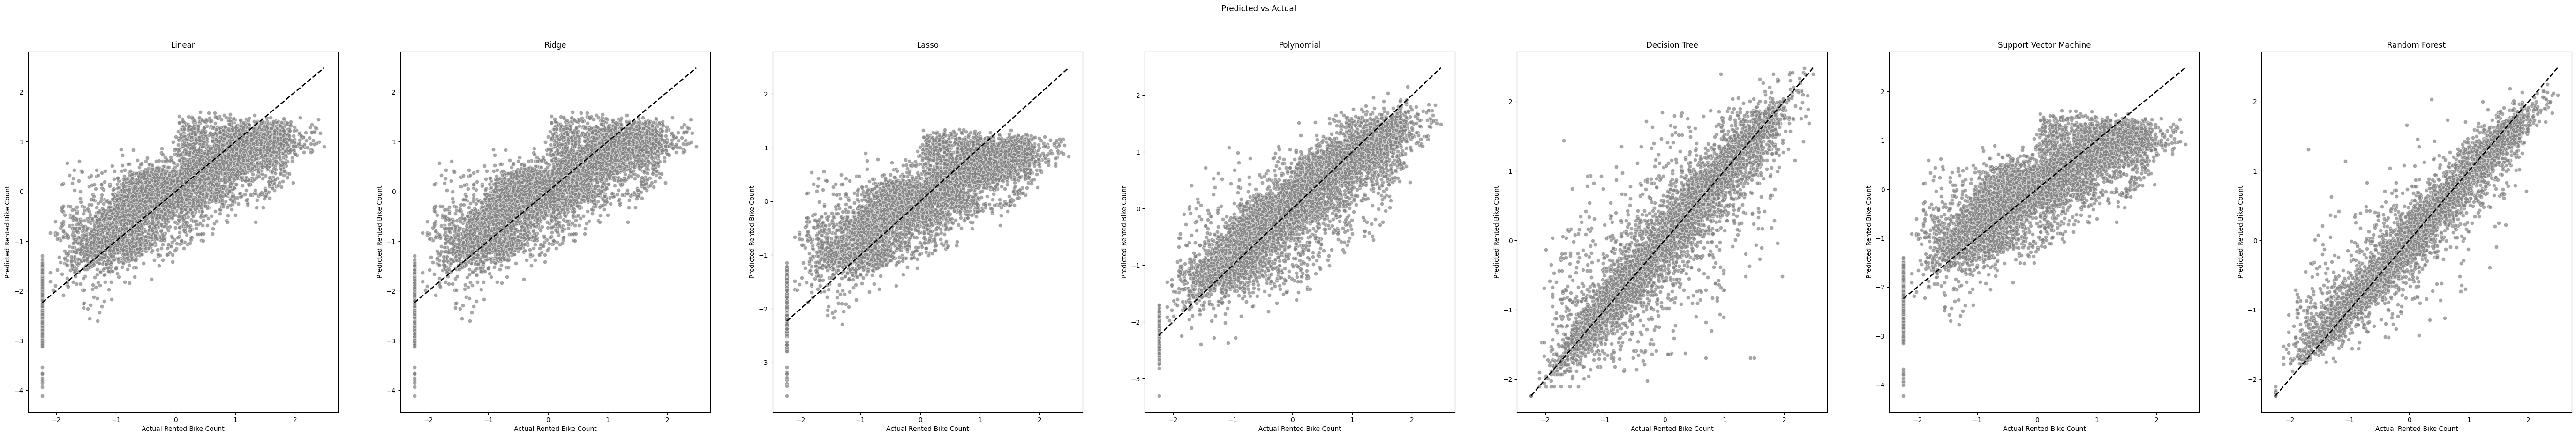

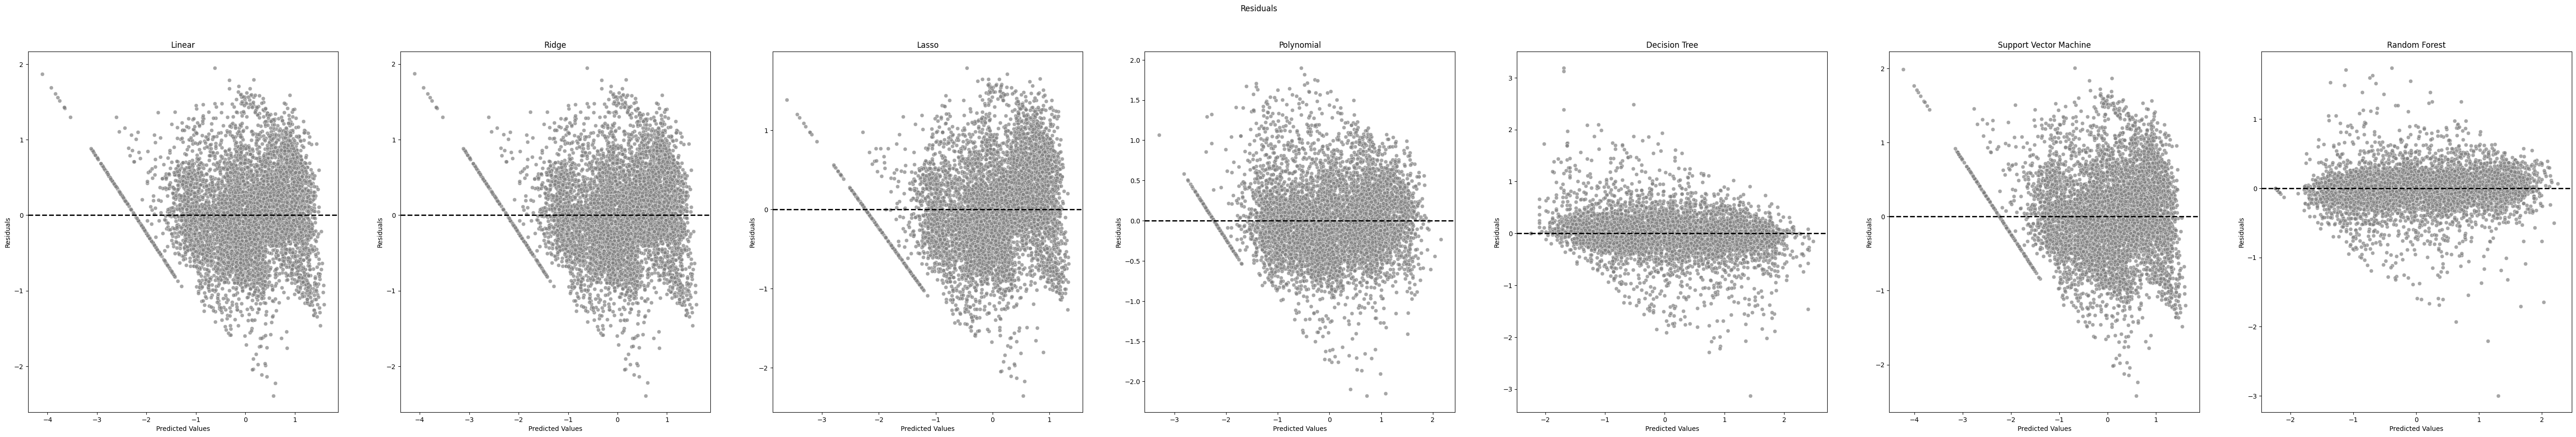

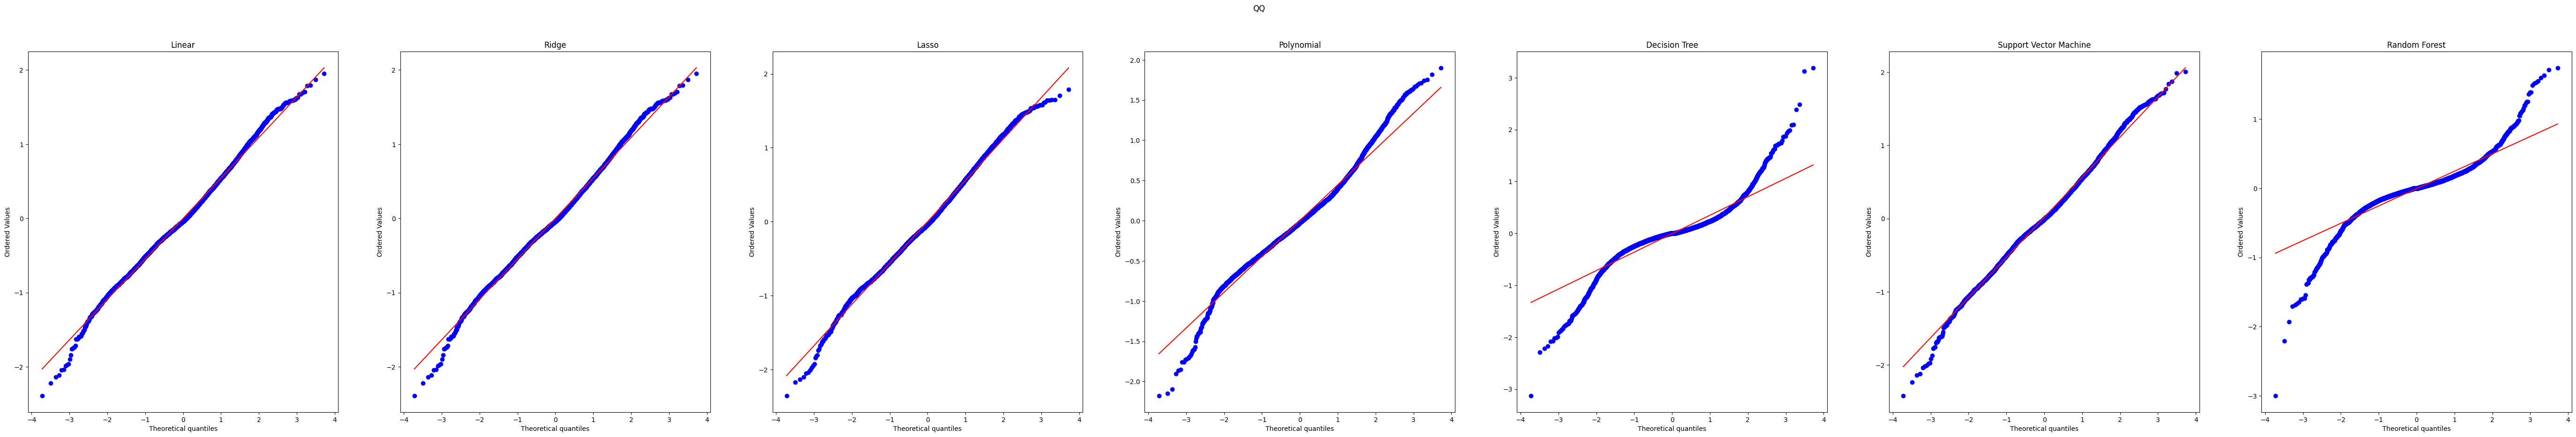

In [140]:
# Obtaining total number of models
n = len(y_preds)

# Ploting Actual vs Predicted group of plots
fig_AvP = plt.figure(figsize=(n*10, 10))
for i, y_pred, name in zip(range(1, n + 1), y_preds, model_names):
    AvP_plot(y_train, y_pred, name, fig_AvP, i, n)

fig_AvP.suptitle("Predicted vs Actual")
plt.show()

# List to store residual values
residuals = []
# Ploting Actual vs Predicted group of plots
fig_residuals = plt.figure(figsize=(n*10, 10))
for i, y_pred, name in zip(range(1, n + 1), y_preds, model_names):
    residuals.append(residuals_plot(y_train, y_pred, name, fig_residuals, i, n))

fig_residuals.suptitle("Residuals")
plt.show()

# Ploting QQ group of plots
fig_QQ = plt.figure(figsize=(n*10, 10))
for i, residual, name in zip(range(1, n + 1), residuals, model_names):
    QQ_plot(residual, name, fig_QQ, i, n)

fig_QQ.suptitle("QQ")
plt.show()


From the results of this visuals, we are pretty satisfied on the work done in data preprocessing phases, since all of the tested models achievied good results fitting the data. However, we have a peculiar behavior: The best scored models (Random Forest and Desicion trees), seem to have a pretty well adaptation on the Actual vs Predicted and Residuals plots, but, in QQ plot, they have the worst fitting compared to the expected results (diagonal line). To understand this phenomenon, we need to recall the fact that QQ plot is setted to work with normal shaped data. Then, de adaptation of the quantiles gets better when our data is also normally shaped; if we get good scores in the evaluations but not the best fittings against the expectations in QQ plot (as in this case), it usually means that the patterns in the data do not follow a normal distribution, deviating from normality an leading to non-ideal QQ plot. Relying on this, we should not be scared of these phenomenom and understand it as a result of the nature from our data.

## Best models Parameter Tunning (Randomized Grid Search)

In order to create a robust regressor model, we would like to test the best models from the previous phase in order to find their best parameter tunning. To acomplish it, we implement Randomized Grid Search which is a hyperparameter tuning technique commonly used in machine learning to find the optimal set of hyperparameters for a model. It samples a predefined number of hyperparameter configurations from specified distributions or ranges, and enables a more efficient exploration of the hyperparameter space, particularly when the search space is extensive.

### Grid search function creation

In [127]:
from sklearn.model_selection import RandomizedSearchCV
def model_gridSearch(model, params, X_train, y_train, k=5, iter=5):
    gridSearch_obj = RandomizedSearchCV(model, params, cv=k, n_jobs=-1, verbose=3, n_iter=iter)

    gridSearch_obj.fit(X_train, y_train)

    return gridSearch_obj


### Models generation and grid search parameters declaration

For each model we selected a set of values for their hyperparameters which are:
- Polynomial
    - Degree: highest power of the independent variable in the regression equation.
- Desicion Tree
    - Criterion: criterion used to measure the quality of a split.
    - Maximum depth: maximum depth of the tree.
    - Minimum samples split: minimum number of samples required to split an internal node. 
    - Minimum samples leaf: minimum number of samples required to be in a leaf node.
    - Maximum features: maximum number of features considered for splitting a node.
- Support Vector
    - Kernel: The kernel function determines the type of decision boundary used by the SVR.
    - Gamma: Defines the influence of a single training example. Higher values result in a more complex decision boundary.
    - Degree: For polynomial kernels, defines the degree of the polynomial function.
    - C: The regularization parameter controls the trade-off between achieving a low training error and a low testing error.

In [128]:
# Polynomial model
poly_regr = make_pipeline(PolynomialFeatures(), LinearRegression())
poly_params = {'polynomialfeatures__degree': range(2,6)}

# Decision model
dt_model = DecisionTreeRegressor()
dt_params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
             "max_depth" : [1,3,5,7,9,11,12],
             'min_samples_split': [8, 10, 12, 16, 18, 20],
             "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
             "max_features":["auto","log2","sqrt",None]}

# Support Vector Machine model
svr_model = SVR()
svr_params = {'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.001, 0.01, 0.1, 0.5, 1],
              'degree': [2, 3, 4],
              'C': [5, 10, 20, 50, 100, 200, 500]}

model_params_list = [(poly_regr, poly_params, 'Polynomial'),(dt_model, dt_params, 'Decision tree'), (svr_model, svr_params, 'Support vector')]

### Grid Search processing

In [129]:
# Grid search for every tuple in grid_results_list
grid_results_list = []
for model_param in model_params_list:
    grid_search_model = model_gridSearch(model_param[0], model_param[1], X_train, y_train, k=3, iter=20) 
    grid_results_list.append((model_param[2], grid_search_model))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


### Grid Search results

In [130]:
for grid_result in grid_results_list:
    print(f"{grid_result[0]} model results:")
    print(f"Best score: {grid_result[1].best_score_}")
    print(f"Best parameters: ")
    print(grid_result[1].best_params_)
    display(pd.DataFrame(grid_result[1].cv_results_))

Polynomial model results:
Best score: 0.8004243094217731
Best parameters: 
{'polynomialfeatures__degree': 2}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.136119      0.007365         0.010416        0.007365   
1       0.802673      0.015499         0.017796        0.010217   
2      32.189147      0.117820         0.063549        0.001198   
3      81.416581      0.233923         0.152514        0.010127   

  param_polynomialfeatures__degree                             params  \
0                                2  {'polynomialfeatures__degree': 2}   
1                                3  {'polynomialfeatures__degree': 3}   
2                                4  {'polynomialfeatures__degree': 4}   
3                                5  {'polynomialfeatures__degree': 5}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0       8.017177e-01       7.910109e-01       8.085443e-01     8.004243e-01   
1      -8.031191e+04      -2.456266e+13      -4.640377e+13    -2.365548e+13   
2      -1.223740e+19      -1.268242e+18      -2.252566e+18    -5.252737e+18   
3      -7.339264e+08      -9.368864e+07      -1.084951e+07    -2.794882e+08   

   std_test_score  rank_test_score  
0    7.216166e-03                1  
1    1.895512e+13                3  
2    4.955224e+18                4  
3    3.231111e+08                2

Decision tree model results:
Best score: 0.865801755347743
Best parameters: 
{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 11, 'criterion': 'absolute_error'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010846      0.000116         0.003011    7.910955e-05   
1        0.008599      0.001601         0.003734    1.007982e-03   
2        0.139889      0.003521         0.002461    3.479869e-03   
3        0.008674      0.000470         0.002999    5.947204e-07   
4        0.014657      0.003895         0.007736    5.111008e-03   
5        0.006775      0.001998         0.004484    4.394670e-03   
6        0.442542      0.023141         0.005508    1.559962e-03   
7        0.578040      0.024428         0.001000    1.413549e-03   
8        0.150180      0.011436         0.005612    1.624543e-03   
9        0.012304      0.001332         0.005675    1.439702e-03   
10       0.012785      0.000575         0.004890    7.799977e-05   
11       0.029919      0.002992         0.005015    1.874518e-03   
12       0.017914      0.001342         0.004172    2.434403e-04   
13       0.419183      0.025863         0.004333    4.715966e-04   
14       0.027183      0.000464         0.004078    5.428549e-05   
15       0.010162      0.000840         0.001980    1.460140e-03   
16       0.010705      0.001749         0.003536    4.103995e-04   
17       1.006783      0.010706         0.002172    5.367767e-04   
18       0.006563      0.002125         0.002644    2.562722e-03   
19       0.287859      0.034107         0.003004    8.196521e-04   

   param_min_samples_split param_min_samples_leaf param_max_features  \
0                       12                      8               log2   
1                       18                      8               log2   
2                       16                      6               log2   
3                       20                      8               log2   
4                       18                      6               auto   
5                       18                      8               sqrt   
6                       10                      6               sqrt   
7                       20                      6               auto   
8                       20                      6               log2   
9                       12                      7               sqrt   
10                       8                      1               sqrt   
11                      16                      1               None   
12                      16                      5               None   
13                      20                      1               sqrt   
14                      18                      2               auto   
15                      16                      9               log2   
16                       8                      7               log2   
17                      10                      2               None   
18                      20                      1               log2   
19                      20                      8               sqrt   

   param_max_depth param_criterion  \
0                7   squared_error   
1                5   squared_error   
2                1  absolute_error   
3                7   squared_error   
4                5    friedman_mse   
5               12    friedman_mse   
6               11  absolute_error   
7                1  absolute_error   
8                1  absolute_error   
9                9    friedman_mse   
10              11   squared_error   
11               9   squared_error   
12               5    friedman_mse   
13              11  absolute_error   
14               9   squared_error   
15               9   squared_error   
16               7    friedman_mse   
17              11  absolute_error   
18               1   squared_error   
19               5  absolute_error   

                                               params  split0_test_score  \
0   {'min_samples_split': 12, 'min_samples_leaf': ...           0.754983   
1   {'min_samples_split': 18, 'min_samples_leaf': ...           0.502330   
2   {'min_samples_split': 16, 'min_

Support vector model results:
Best score: 0.8814540505925056
Best parameters: 
{'kernel': 'rbf', 'gamma': 0.5, 'degree': 4, 'C': 100}


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0        1.040333      0.021051         1.729751        0.061063          rbf   
1        2.345382      0.036967         1.529536        0.066251          rbf   
2      608.891184     13.602671         0.077509        0.003147         poly   
3       11.741883      0.530687         1.467653        0.012446          rbf   
4        1.694991      0.043186         1.592442        0.057308          rbf   
5        0.943523      0.055053         0.262557        0.005438         poly   
6       11.872292      0.362391         1.413122        0.074615          rbf   
7        2.702269      0.031649         0.209067        0.001010       linear   
8        0.902933      0.027877         0.230058        0.006425         poly   
9       74.722065      1.312672         0.105118        0.006039         poly   
10       1.366039      0.069367         1.506394        0.065389          rbf   
11      25.203335      0.510389         0.213057        0.005707       linear   
12      11.130884      0.314606         1.274277        0.090775          rbf   
13      47.681886      0.774403         0.137677        0.016456       linear   
14      14.360939      0.324269         0.208911        0.011336       linear   
15       0.891744      0.010691         0.233408        0.004722         poly   
16       1.285181      0.099226         0.219875        0.011827         poly   
17      13.799283      0.186009         0.179126        0.009644       linear   
18       1.977251      0.075013         0.210630        0.003665       linear   
19       8.017712      0.121115         0.200542        0.009559       linear   

   param_gamma param_degree param_C  \
0        0.001            2       5   
1          0.1            3      50   
2            1            4      20   
3          0.1            2     500   
4         0.01            4     200   
5         0.01            4      10   
6          0.1            3     500   
7          0.1            2      10   
8         0.01            2      20   
9            1            2     100   
10         0.1            4      10   
11         0.5            4     200   
12         0.5            4     100   
13       0.001            3     500   
14         0.1            4     100   
15        0.01            3     100   
16         0.1            4      50   
17       0.001            2     100   
18           1            2       5   
19         0.1            2      50   

                                               params  split0_test_score  \
0   {'kernel': 'rbf', 'gamma': 0.001, 'degree': 2,...           0.640133   
1   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...           0.815859   
2   {'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C...           0.823008   
3   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, '...           0.844419   
4   {'kernel': 'rbf', 'gamma': 0.01, 'degree': 4, ...           0.776229   
5   {'kernel': 'poly', 'gamma': 0.01, 'degree': 4,...           0.021295   
6   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, '...           0.844419   
7   {'kernel': 'linear', 'gamma': 0.1, 'degree': 2...           0.702896   
8   {'kernel': 'poly', 'gamma': 0.01, 'degree': 2,...           0.691794   
9   {'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C...           0.781751   
10  {'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, '...           0.802416   
11  {'kernel': 'linear', 'gamma': 0.5, 'degree': 4...           0.702984   
12  {'kernel': 'rbf', 'gamma': 0.5, 'degree': 4, '...           0.871628   
13  {'kernel': 'linear', 'gamma': 0.001, 'degree':...           0.703009   
14  {'kernel': 'linear', 'gamma': 0.1, 'degree': 4...           0.702998   
15  {'kernel': 'poly', 'gamma': 0.01, 'degree': 3,...           0.542183   
16  {'kernel': 'poly', 'gamma': 0.1, 'degree': 4, ...           0.792016   
17  {'kernel': 'linear', 'gamma': 0.001, 'degree':...           0.702998   
18  {'kernel': 'linear', 'gamma': 1, '

## Final Ensemble model

For the final model we decided to implement an ensemble model with stacking ensemble method which works by training a set of individual models, each employing different algorithms or approaches, on the same dataset. These base models generate predictions for a given input. Subsequently, a meta-model, often a simple regression or another machine learning model, is trained to learn the optimal combination of these base model predictions. This meta-model takes the individual predictions as input features and produces the final ensemble prediction.  
The final configuration for this ensemble method was:
- Base Models
    - Polynomial 
        - Degree = 2
    - Decision tree
        - min_samples_split = 10
        - min_samples_leaf = 2
        - max_features = None
        - max_depth = 11
        - criterion = absolute_error
    - Support vector
        - kernel = RBF
        - gamma = 0.5
        - degree = 4
        - C = 100
- Meta model: Random Forest

### Final Ensemble model generation, training and prediction

In [141]:
from sklearn.ensemble import StackingRegressor

# Declaring Base models
estimators = [('Polynomial', make_pipeline(PolynomialFeatures(2), LinearRegression())),
              ('Decision tree', DecisionTreeRegressor(min_samples_split= 10, min_samples_leaf= 2, max_features= None, max_depth= 11, criterion= 'absolute_error')),
              ('Support vector', SVR(kernel= 'rbf', gamma= 0.5, degree= 4, C= 100))]

# Declaring stacking
k = 5
stacking_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(), cv=k)

# Fitting stack
stacking_model.fit(X_train, y_train)

# Predicting on test data
y_pred_stack = stacking_model.predict(X_test)

## Final Ensemble model evaluation

In [132]:
# Obtaining Scores
stacking_score = stacking_model.score(X_test, y_test)
stacking_mse = mean_squared_error(y_test, y_pred_stack)
stacking_mae = mean_absolute_error(y_test, y_pred_stack)

# Printing scores
print(f"Stacking ensemble evaluation")
print(f"\tScore: {stacking_score}")
print(f"\tMean Squared Error: {stacking_mse}")
print(f"\tMean Absolute Error: {stacking_mae}")

Stacking ensemble evaluation
	Score: 0.9238482651201356
	Mean Squared Error: 0.07463168782386827
	Mean Absolute Error: 0.1829999345413162


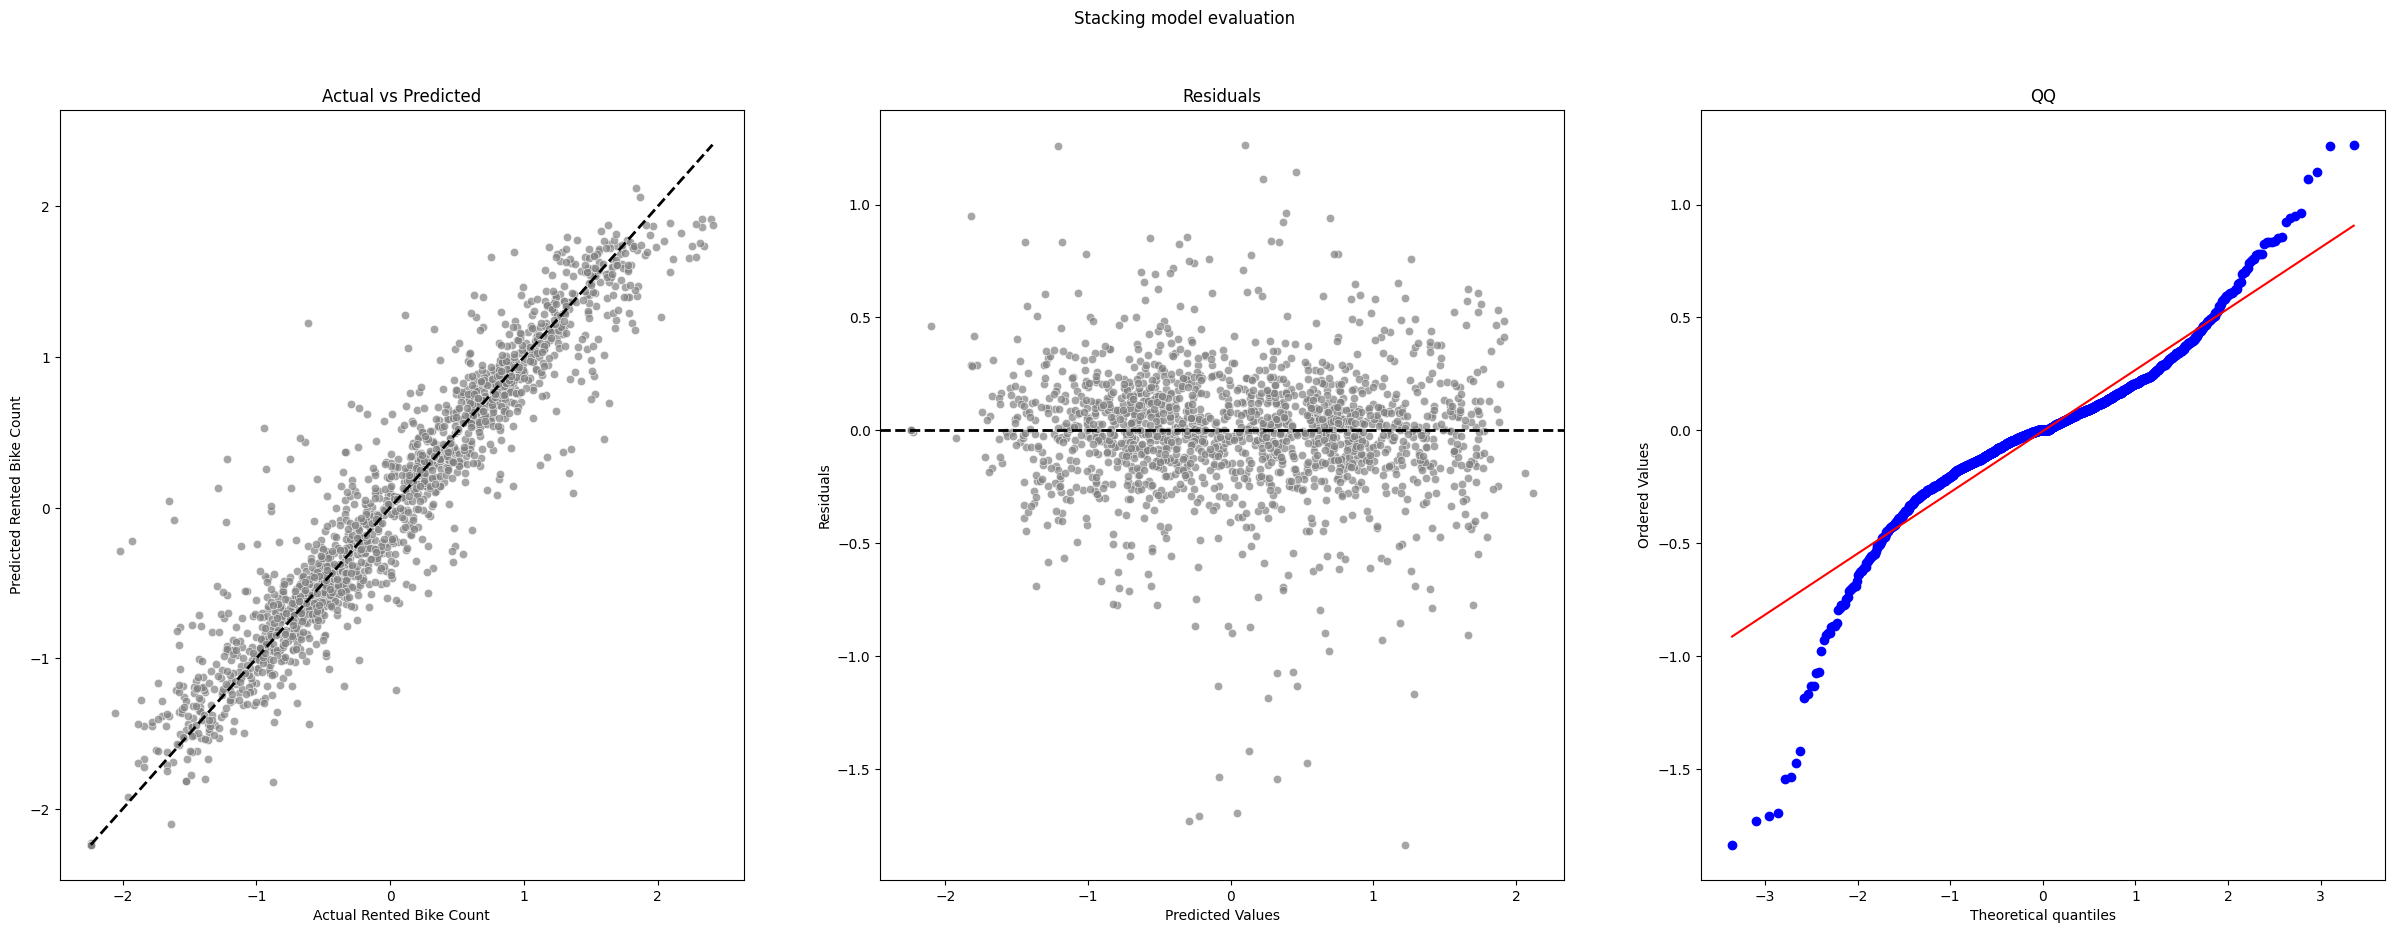

In [143]:
# Plotting visual evaluations
n = 3

fig_stacking = plt.figure(figsize=(n*10, 10))
AvP_plot(y_test, y_pred_stack, 'Actual vs Predicted', fig_stacking, 1, n)
residuals_stacking = residuals_plot(y_test, y_pred_stack, 'Residuals', fig_stacking, 2, n)
QQ_plot(residuals_stacking, 'QQ', fig_stacking, 3, n)

fig_stacking.suptitle("Stacking model evaluation")
plt.show()


Achieving exceptional results, our models reforces its fitting by achieving satisfactory results also in the test data. Is impressive to note how the maximum variations in the predictions are smaller than 1.5 rented bikes, considering the normal range of this feature (from 2,000 to 3,000), our error is very small. Our model is reliable.